In [1]:
import os
import warnings
import time
import threading
import seaborn as sns
from sklearn.metrics import mean_squared_error
from source.jabba import JABBA
from source.jabba import fastQABBA, fastQABBA_len, fastQABBA_inc
from source.jabba import JABBA
from source.jabba import QABBA
from fABBA import fABBA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('bmh')
# warnings.filterwarnings("error")

In [2]:
num = 5000
mu, sigma = 0, 1
tol, alpha = 0.01, 0.1
quantized_bits = [4, 8, 12, 16, 20, 24, 28]
num_data = 100

err_fabba = np.zeros(num_data)
err_qabba_len = np.zeros((num_data, len(quantized_bits)))
err_qabba_inc = np.zeros((num_data, len(quantized_bits)))
partition = 1
for rd in tqdm(range(num_data)):
    np.random.seed(rd)
    synthetic_ts = np.random.normal(mu, sigma, num)
    # synthetic_ts = (synthetic_ts - synthetic_ts.mean()) / synthetic_ts.std()
    fabba = fABBA(tol=tol, alpha=alpha, sorting='norm', verbose=0)
    symbs_fabba = fabba.fit_transform(synthetic_ts)
    reconst_fabba = fabba.inverse_transform(symbs_fabba, synthetic_ts[0])
    minlen = min(len(reconst_fabba), len(synthetic_ts))
    err_fabba[rd] = mean_squared_error(synthetic_ts[:minlen], reconst_fabba[:minlen])
    
    for b in range(len(quantized_bits)):
        bit = quantized_bits[b]
        qabba = fastQABBA_inc(tol=tol, alpha=alpha, bits_for_len=32, bits_for_inc=bit, verbose=0)
        symbs_qabba = qabba.transform(synthetic_ts)
        reconst_qabba = qabba.inverse_transform(symbs_qabba, synthetic_ts[0])
        minlen = min(len(reconst_qabba), len(synthetic_ts))
        err_qabba_inc[rd, b] = mean_squared_error(synthetic_ts[:minlen], reconst_qabba[:minlen])
        
    for b in range(len(quantized_bits)):
        bit = quantized_bits[b]
        qabba = fastQABBA_len(tol=tol, alpha=alpha, bits_for_len=bit, bits_for_inc=32, verbose=0)
        symbs_qabba = qabba.transform(synthetic_ts)
        reconst_qabba = qabba.inverse_transform(symbs_qabba, synthetic_ts[0])
        minlen = min(len(reconst_qabba), len(synthetic_ts))
        err_qabba_len[rd, b] = mean_squared_error(synthetic_ts[:minlen], reconst_qabba[:minlen])
    

 54%|█████▍    | 54/100 [02:03<01:45,  2.30s/it]/home/research/xinyechen/qabbacp/source/jabba/qabba.py:1089: RuntimeWarning: invalid value encountered in divide
  return inv_transform(strings, centers, self.parameters.alphabets.tolist(), start)
 55%|█████▌    | 55/100 [02:06<01:43,  2.30s/it]/home/research/xinyechen/qabbacp/source/jabba/qabba.py:1089: RuntimeWarning: invalid value encountered in divide
  return inv_transform(strings, centers, self.parameters.alphabets.tolist(), start)
 60%|██████    | 60/100 [02:17<01:32,  2.30s/it]/home/research/xinyechen/qabbacp/source/jabba/qabba.py:1089: RuntimeWarning: invalid value encountered in divide
  return inv_transform(strings, centers, self.parameters.alphabets.tolist(), start)
 74%|███████▍  | 74/100 [02:50<01:01,  2.36s/it]/home/research/xinyechen/qabbacp/source/jabba/qabba.py:1089: RuntimeWarning: invalid value encountered in divide
  return inv_transform(strings, centers, self.parameters.alphabets.tolist(), start)
100%|██████████| 100

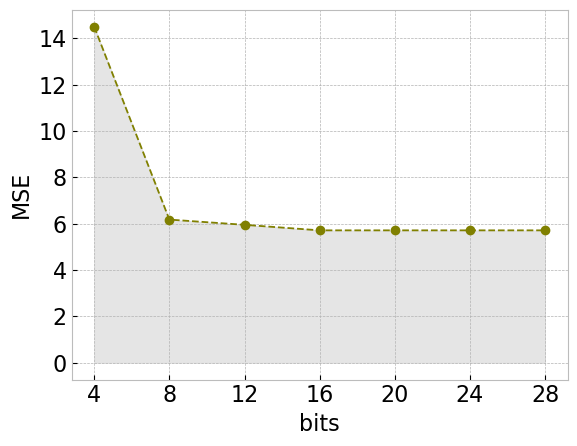

In [3]:
plt.rcParams['axes.facecolor'] = 'white'
plt.plot(quantized_bits, (err_qabba_len.mean(axis=0) - np.mean(err_fabba)), linewidth=1.3, linestyle='--',
         label='Quantization', markersize=6, marker='o', color='olive')

# plt.plot(quantized_bits, [np.mean(err_fabba)]*8, linewidth=1.5, linestyle=':',
#          label='Non-quantization', markersize=6, marker='*')

plt.fill_between(quantized_bits, (err_qabba_len.mean(axis=0) - np.mean(err_fabba)), 0, color='grey', alpha=0.2)
plt.xticks(quantized_bits)
plt.xlabel("bits", fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('MSE', fontsize=16)

# plt.title('len', fontsize=16)
# plt.grid(True)
# plt.legend(fontsize=16, loc='best')
plt.savefig('figs/mse_qlen.pdf', bbox_inches='tight') 
plt.show()

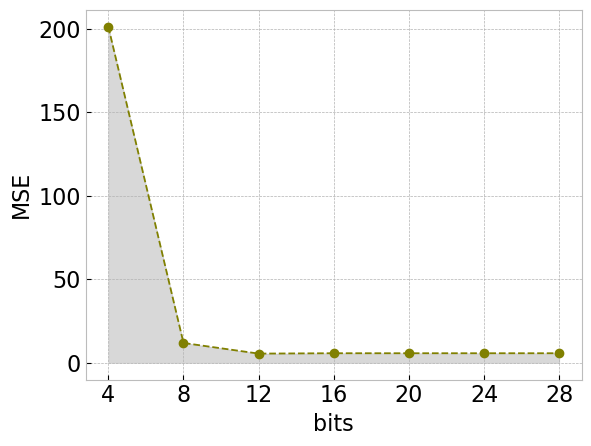

In [4]:
plt.rcParams['axes.facecolor'] = 'white'
plt.plot(quantized_bits, (err_qabba_inc.mean(axis=0) - np.mean(err_fabba)), linewidth=1.3, linestyle='--',
         label='Quantization', markersize=6, marker='o', color='olive')

# plt.plot(quantized_bits, [np.mean(err_fabba)]*8, linewidth=1.5, linestyle=':',
#          label='Non-quantization', markersize=6, marker='*')

plt.fill_between(quantized_bits, (err_qabba_inc.mean(axis=0) - np.mean(err_fabba)), 0, color='grey', alpha=0.3)
plt.xticks(quantized_bits)
plt.xlabel("bits", fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('MSE', fontsize=16)

# plt.title('len', fontsize=16)
# plt.grid(True)
# plt.legend(fontsize=16, loc='best')
plt.savefig('figs/mse_qinc.pdf', bbox_inches='tight') 
plt.show()